In [1]:
from pathways.scenarios import run_scenarios, load_scenario_table
from pathways.simulation import load_configuration
from pathways.outputs import save_scenario_result_to_pandas

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pathlib import Path
datadir = Path("tests/test_summaries")
basic_config = load_configuration(datadir / "config.yml")
scenario_table = load_scenario_table(datadir / "scenarios_config_subset.csv")

In [4]:
results = run_scenarios(
    config=basic_config,
    scenario_table=scenario_table,
    seed=42,
    num_simulations=1,
    num_consignments=10,
)

Running scenario: clustered_12
Running scenario: clustered_11
Running scenario: clustered_02
Running scenario: clustered_01
Running scenario: clustered_39
Running scenario: clustered_38
Running scenario: clustered_19
Running scenario: clustered_18
Running scenario: random_12
Running scenario: random_11
Running scenario: random_02
Running scenario: random_01
Running scenario: random_39
Running scenario: random_38
Running scenario: random_19
Running scenario: random_18
Running scenario: maritime_12
Running scenario: maritime_11
Running scenario: maritime_02
Running scenario: maritime_01
Running scenario: maritime_39
Running scenario: maritime_38
Running scenario: maritime_19
Running scenario: maritime_18
Running scenario: contamination5_12
Running scenario: contamination5_11
Running scenario: contamination5_02
Running scenario: contamination5_01
Running scenario: contamination5_39
Running scenario: contamination5_38
Running scenario: contamination5_19
Running scenario: contamination5_18


In [11]:
df = save_scenario_result_to_pandas(
    results,
    config_columns=[
        "name",
        "consignment_name",
        "inspection_name",
        "consignment/boxes/min",
        "consignment/boxes/max",
        "consignment/items_per_box/default",
        "contamination/contamination_rate/parameters",
        "contamination/arrangement",
        "inspection/unit",
        "inspection/sample_strategy",
        "inspection/proportion/value",
        "inspection/hypergeometric/detection_level",
        "inspection/selection_strategy",
        "inspection/within_box_pct",
        "inspection/cluster/cluster_selection",
    ],
    result_columns=[
        "missing",
        "true_contamination_rate",
        "max_missed_contamination_rate",
        "avg_missed_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_items_inspected_completion",
        "avg_items_inspected_detection",
        "pct_contaminant_unreported_if_detection",
    ],
)

In [12]:
df['consignment_name'] = pd.Categorical(df['consignment_name'])
consignment_order = ["infestation_5", "infestation_10", "infestation_25", "small", "large", "maritime", "clustered", "clustered_small", "clustered_large"]
df['consignment_name'] = df['consignment_name'].cat.reorder_categories(consignment_order, ordered=True)
df

ValueError: items in new_categories are not the same as in old categories

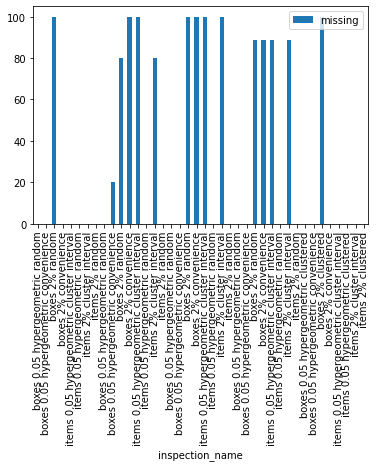

In [13]:
df.plot(kind="bar", x="inspection_name", y="missing")

In [210]:
#df["consignment"] = df.apply(lambda row: re.sub("_[0-9]+$", "", row["name"]), axis = 1)

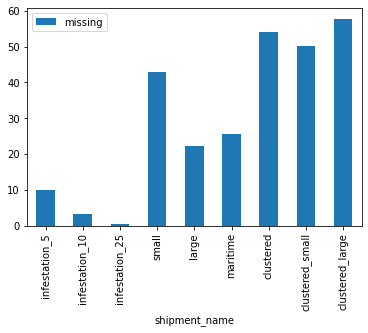

In [211]:
df.groupby("consignment_name").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="consignment_name", y="missing")

Text(0.5, 1.0, 'Avg percent infested shipments missed by inspection')

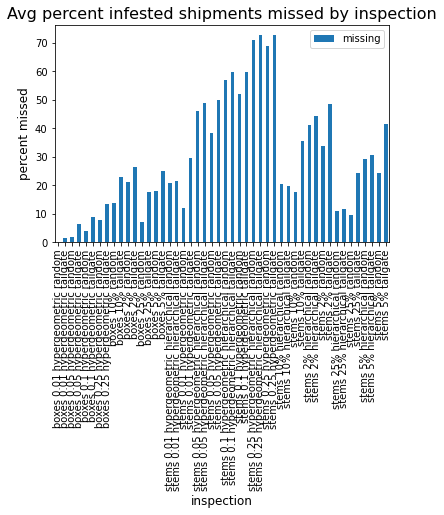

In [212]:
df.groupby("inspection_name").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="inspection_name", y="missing")
plt.xlabel("inspection", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Avg percent contaminated consignments missed by inspection", size=16)

In [213]:
inspections_vs_consignments = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["missing"])
inspections_vs_consignments

missing                 \
shipment_name                                   infestation_5 infestation_10   
inspection_name                                                                
boxes 0.01 hypergeometric random                     0.000000          0.000   
boxes 0.01 hypergeometric tailgate                   0.000000          0.000   
boxes 0.05 hypergeometric random                     0.000000          0.000   
boxes 0.05 hypergeometric tailgate                   0.000000          0.000   
boxes 0.1 hypergeometric random                      0.000000          0.000   
boxes 0.1 hypergeometric tailgate                    0.000000          0.000   
boxes 0.25 hypergeometric random                     0.000000          0.000   
boxes 0.25 hypergeometric tailgate                   0.000000          0.000   
boxes 10% random                                     0.231000          0.000   
boxes 10% tailgate                                   0.180000          0.000   
boxes 2% random                                      0.647000          0.001   
boxes 2% tailgate                                    0.634000          0.000   
boxes 25% random                                     0.016000          0.000   
boxes 25% tailgate                                   0.010000          0.000   
boxes 5% random                                      0.500000          0.000   
boxes 5% tailgate                                    0.478000          0.000   
stems 0.01 hypergeometric hierarchical random        0.206000          0.000   
stems 0.01 hypergeometric hierarchical tailgate      0.239000          0.000   
stems 0.01 hypergeometric random                     0.221000          0.000   
stems 0.01 hypergeometric tailgate                   0.230000          0.000   
stems 0.05 hypergeometric hierarchical random       11.579000          0.466   
stems 0.05 hypergeometric hierarchical tailgate     11.457000          0.478   
stems 0.05 hypergeometric random                    11.387000          0.454   
stems 0.05 hypergeometric tailgate                  11.480000          0.473   
stems 0.1 hypergeometric hierarchical random        29.642000          5.613   
stems 0.1 hypergeometric hierarchical tailgate      29.622000          5.604   
stems 0.1 hypergeometric random                     29.606000          5.523   
stems 0.1 hypergeometric tailgate                   29.622000          5.604   
stems 0.25 hypergeometric hierarchical random       60.349000         32.155   
stems 0.25 hypergeometric hierarchical tailgate     60.487000         31.934   
stems 0.25 hypergeometric random                    60.045000         31.681   
stems 0.25 hypergeometric tailgate                  60.487000         31.934   
stems 10% hierarchical random                        0.643000          0.002   
stems 10% hierarchical tailgate                      0.609000          0.003   
stems 10% random                                     0.591000          0.001   
stems 10% tailgate                                   0.587000          0.001   
stems 2% hierarchical random                        14.794000          1.973   
stems 2% hierarchical tailgate                      14.871000          2.072   
stems 2% random                                     14.813149          1.978   
stems 2% tailgate                                   14.942000          2.057   
stems 25% hierarchical random                        0.042000          0.000   
stems 25% hierarchical tailgate                      0.025000          0.000   
stems 25% random                                     0.033000          0.000   
stems 25% tailgate                                   0.034000          0.000   
stems 5% hierarchical random                         3.143000          0.070   
stems 5% hierarchical tailgate                       3.192000          0.081   
stems 5% random                                      3.215000          0.077   
stems 5% tailgate                                    3

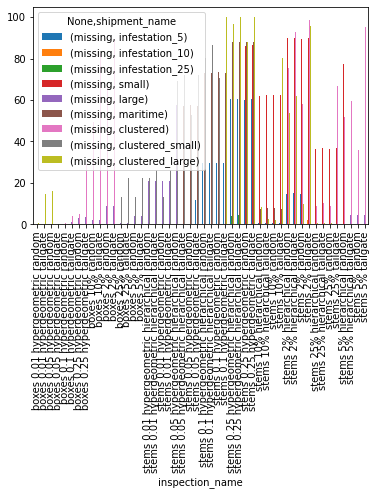

In [214]:
inspections_vs_consignments.plot(kind="bar")

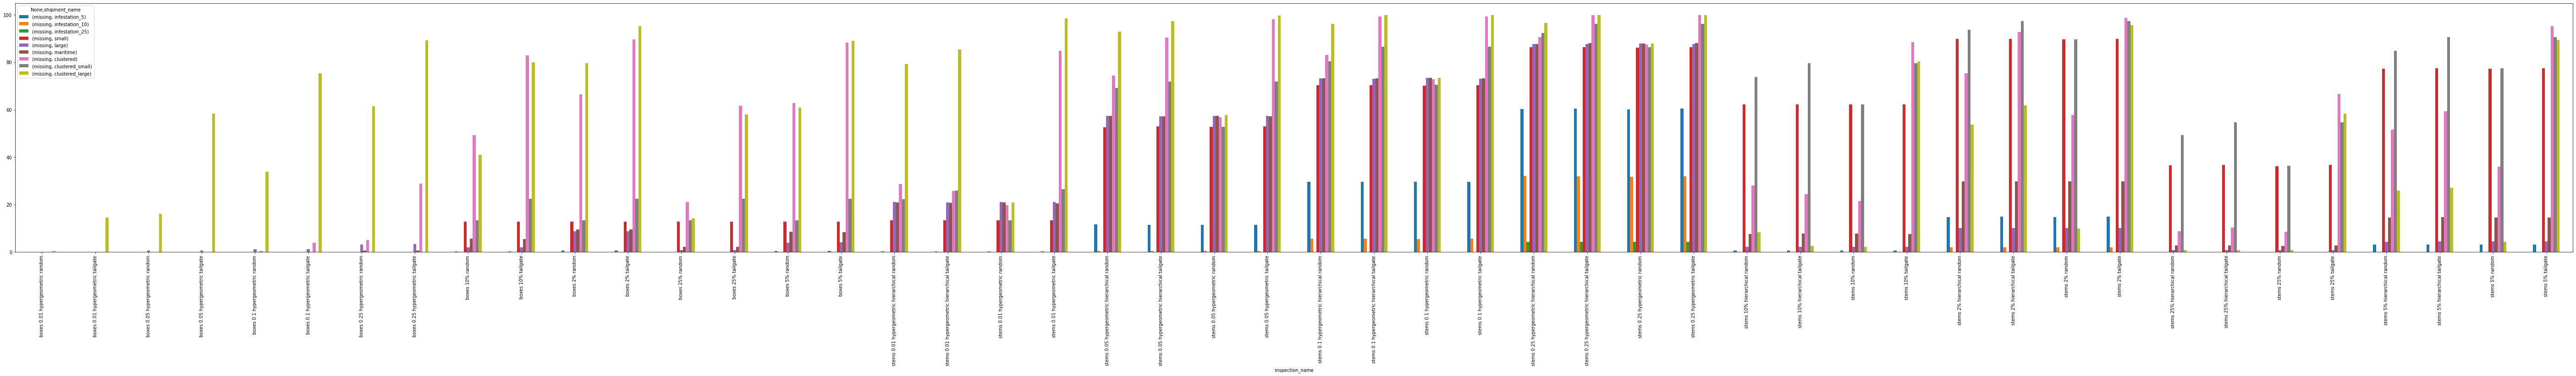

In [215]:
ax = inspections_vs_consignments.plot(kind="bar", figsize=(100, 10))
#ax.figure.savefig("inspections_vs_consignments_bar.png")

In [216]:
from itertools import cycle, islice

it = cycle(list(range(1,49)))
df['inspection_num'] = list(islice(it, len(df)))

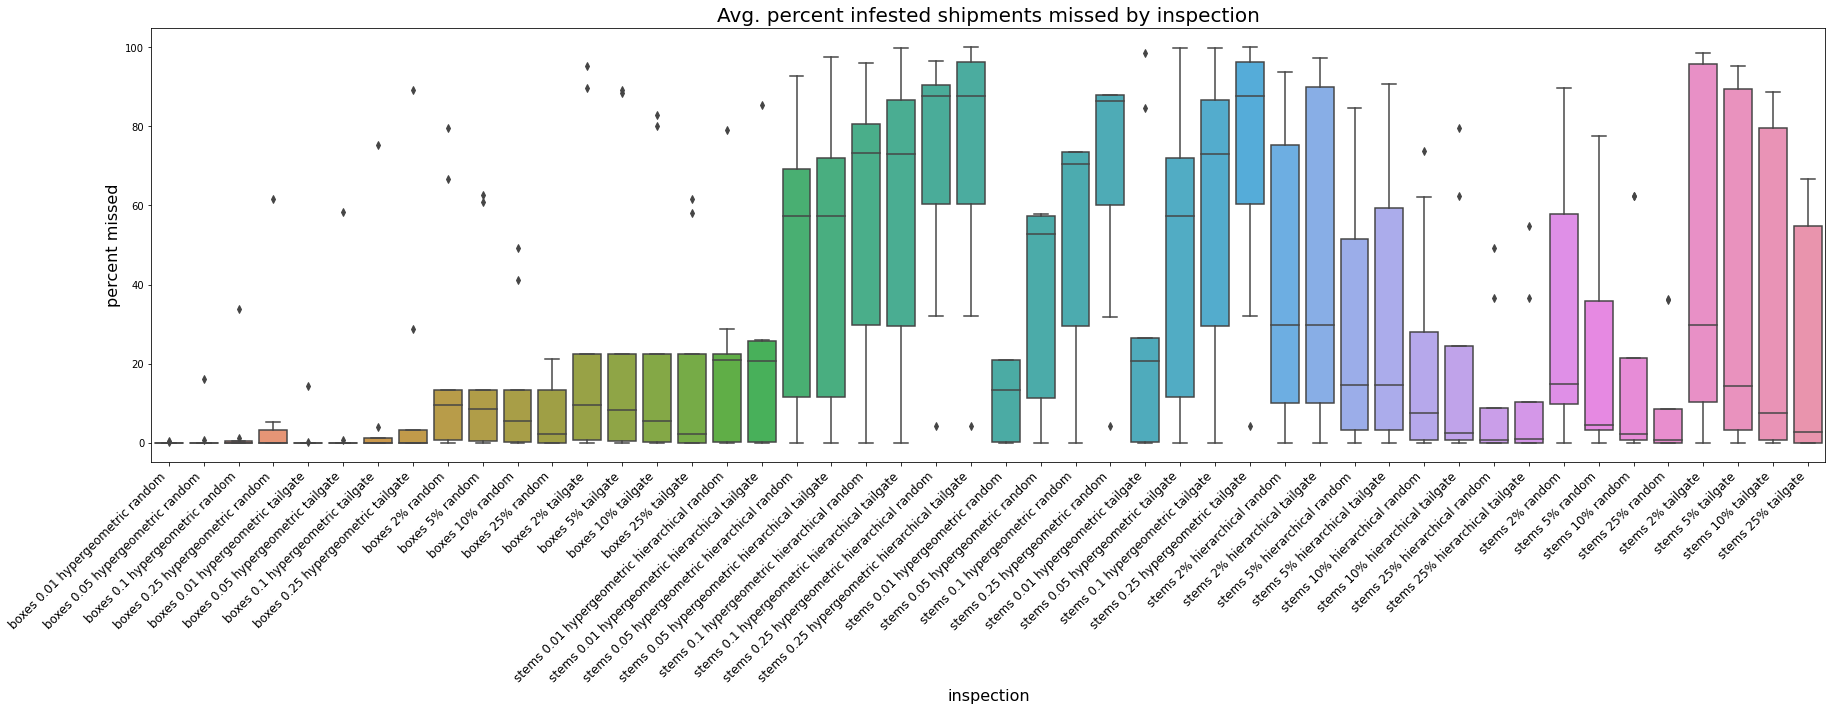

In [242]:
plt.figure(figsize=(30, 8))
sns.boxplot(x="inspection_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("inspection", size=16)
plt.ylabel("percent missed", size=16)
plt.title("Avg. percent contaminated consignments missed by inspection", size=20)
plt.savefig("missed_by_inspection_boxplot.png", bbox_inches = "tight")

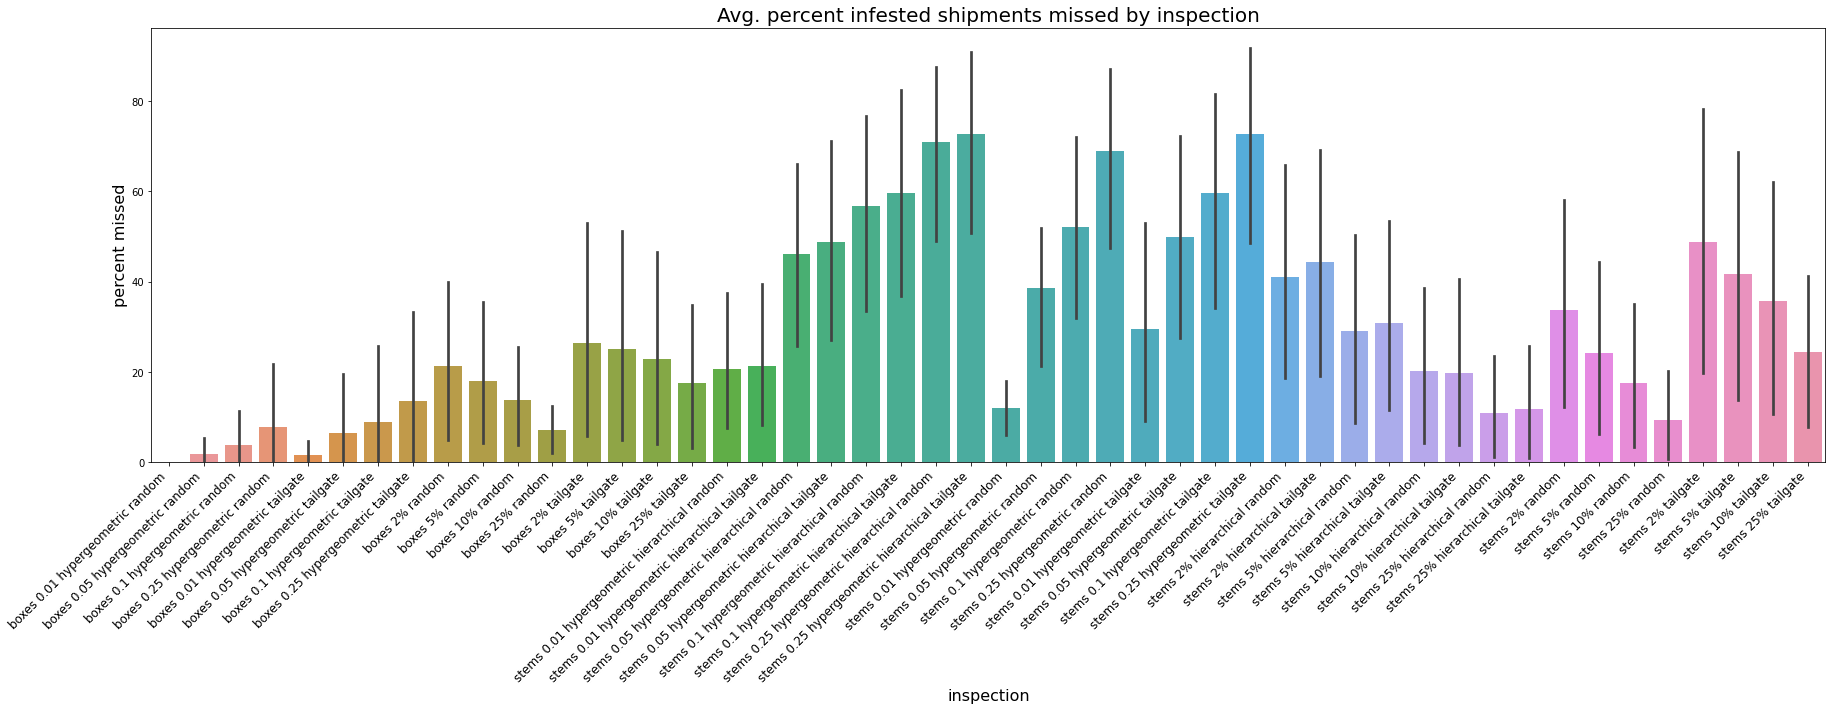

In [243]:
plt.figure(figsize=(30, 8))
sns.barplot(x="inspection_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("inspection", size=16)
plt.ylabel("percent missed", size=16)
plt.title("Avg. percent contaminated consignments missed by inspection", size=20)
plt.savefig("missed_by_inspection.png", bbox_inches = "tight")

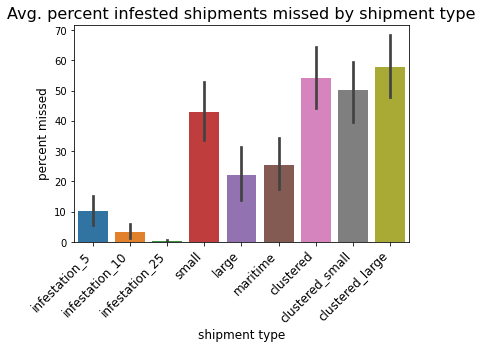

In [218]:
sns.barplot(x="consignment_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Avg. percent contaminated consignments missed by consignment type", size=16)
plt.savefig("missed_by_consignment.png", bbox_inches = "tight")

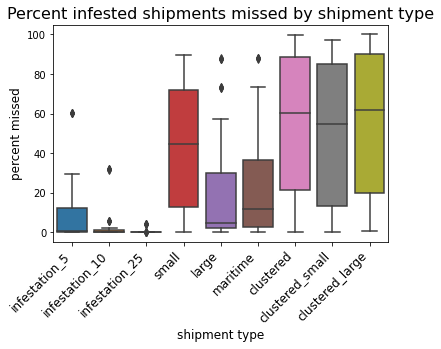

In [219]:
sns.boxplot(x="consignment_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type", size=16)
plt.savefig("missed_by_inspection_boxplot.png", bbox_inches = "tight")

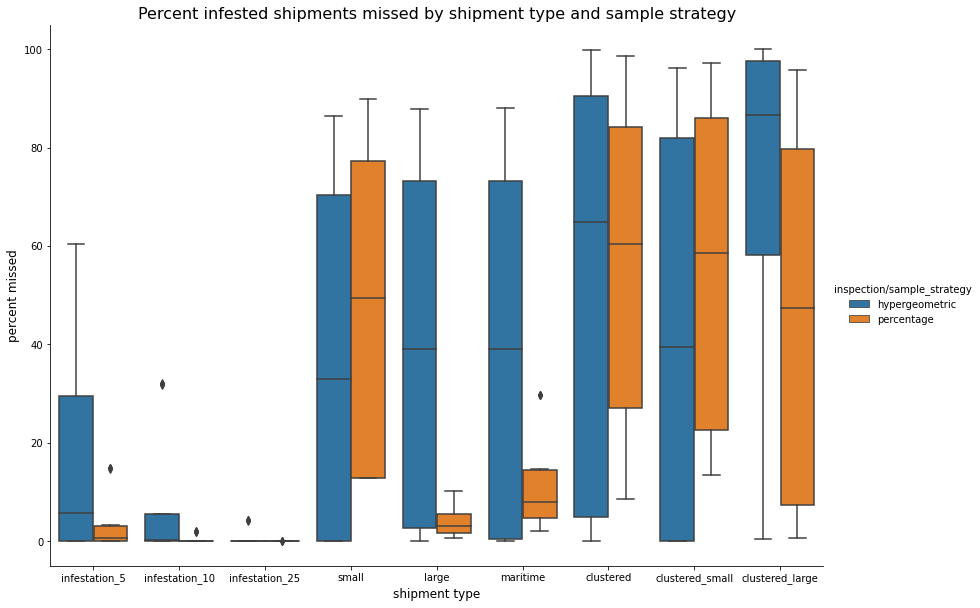

In [220]:
sns.catplot(x="consignment_name", y="missing", hue="inspection/sample_strategy", kind="box", data=df, height=8.27, aspect=11.7/8.27)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type and sample strategy", size=16)
plt.savefig("missed_by_consignment_sample_strategy.png", bbox_inches = "tight")

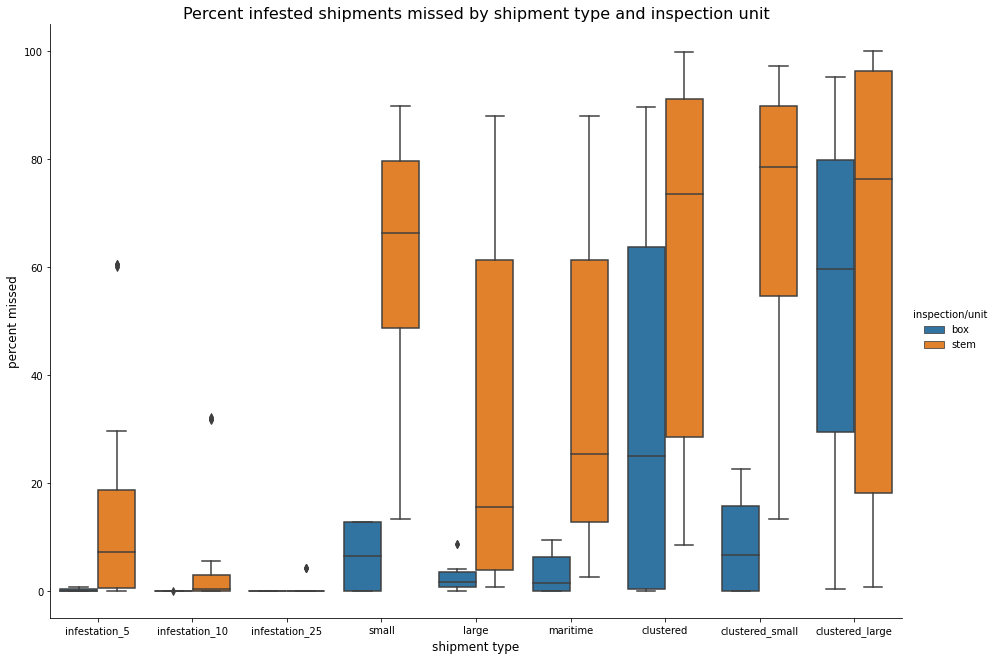

In [221]:
sns.catplot(x="consignment_name", y="missing", hue="inspection/unit", kind="box", data=df, height=9, aspect=11.7/8.27)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type and inspection unit", size=16)
plt.savefig("missed_by_consignment_unit.png", bbox_inches = "tight")

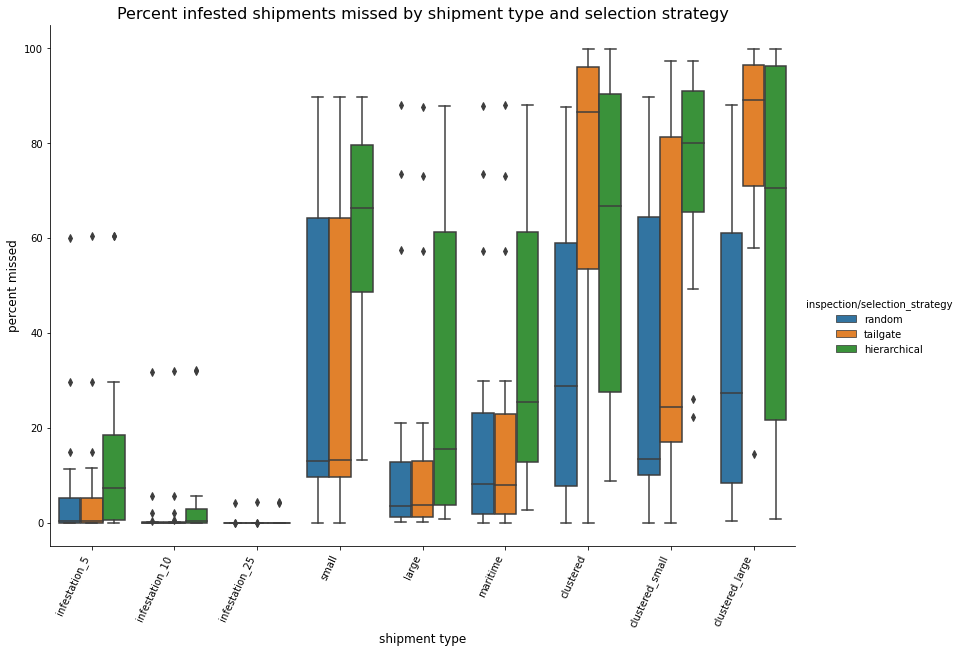

In [222]:
chart = sns.catplot(x="consignment_name", y="missing", hue="inspection/selection_strategy", aspect=11.7/8.27,
            kind="box", data=df, height=8)
chart.set_xticklabels(rotation=65, horizontalalignment='right')
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type and selection strategy", size=16)
chart.savefig("missed_by_consignment_selection.png", bbox_inches = "tight")

In [223]:
inspections_vs_consignments

missing                 \
shipment_name                                   infestation_5 infestation_10   
inspection_name                                                                
boxes 0.01 hypergeometric random                     0.000000          0.000   
boxes 0.01 hypergeometric tailgate                   0.000000          0.000   
boxes 0.05 hypergeometric random                     0.000000          0.000   
boxes 0.05 hypergeometric tailgate                   0.000000          0.000   
boxes 0.1 hypergeometric random                      0.000000          0.000   
boxes 0.1 hypergeometric tailgate                    0.000000          0.000   
boxes 0.25 hypergeometric random                     0.000000          0.000   
boxes 0.25 hypergeometric tailgate                   0.000000          0.000   
boxes 10% random                                     0.231000          0.000   
boxes 10% tailgate                                   0.180000          0.000   
boxes 2% random                                      0.647000          0.001   
boxes 2% tailgate                                    0.634000          0.000   
boxes 25% random                                     0.016000          0.000   
boxes 25% tailgate                                   0.010000          0.000   
boxes 5% random                                      0.500000          0.000   
boxes 5% tailgate                                    0.478000          0.000   
stems 0.01 hypergeometric hierarchical random        0.206000          0.000   
stems 0.01 hypergeometric hierarchical tailgate      0.239000          0.000   
stems 0.01 hypergeometric random                     0.221000          0.000   
stems 0.01 hypergeometric tailgate                   0.230000          0.000   
stems 0.05 hypergeometric hierarchical random       11.579000          0.466   
stems 0.05 hypergeometric hierarchical tailgate     11.457000          0.478   
stems 0.05 hypergeometric random                    11.387000          0.454   
stems 0.05 hypergeometric tailgate                  11.480000          0.473   
stems 0.1 hypergeometric hierarchical random        29.642000          5.613   
stems 0.1 hypergeometric hierarchical tailgate      29.622000          5.604   
stems 0.1 hypergeometric random                     29.606000          5.523   
stems 0.1 hypergeometric tailgate                   29.622000          5.604   
stems 0.25 hypergeometric hierarchical random       60.349000         32.155   
stems 0.25 hypergeometric hierarchical tailgate     60.487000         31.934   
stems 0.25 hypergeometric random                    60.045000         31.681   
stems 0.25 hypergeometric tailgate                  60.487000         31.934   
stems 10% hierarchical random                        0.643000          0.002   
stems 10% hierarchical tailgate                      0.609000          0.003   
stems 10% random                                     0.591000          0.001   
stems 10% tailgate                                   0.587000          0.001   
stems 2% hierarchical random                        14.794000          1.973   
stems 2% hierarchical tailgate                      14.871000          2.072   
stems 2% random                                     14.813149          1.978   
stems 2% tailgate                                   14.942000          2.057   
stems 25% hierarchical random                        0.042000          0.000   
stems 25% hierarchical tailgate                      0.025000          0.000   
stems 25% random                                     0.033000          0.000   
stems 25% tailgate                                   0.034000          0.000   
stems 5% hierarchical random                         3.143000          0.070   
stems 5% hierarchical tailgate                       3.192000          0.081   
stems 5% random                                      3.215000          0.077   
stems 5% tailgate                                    3

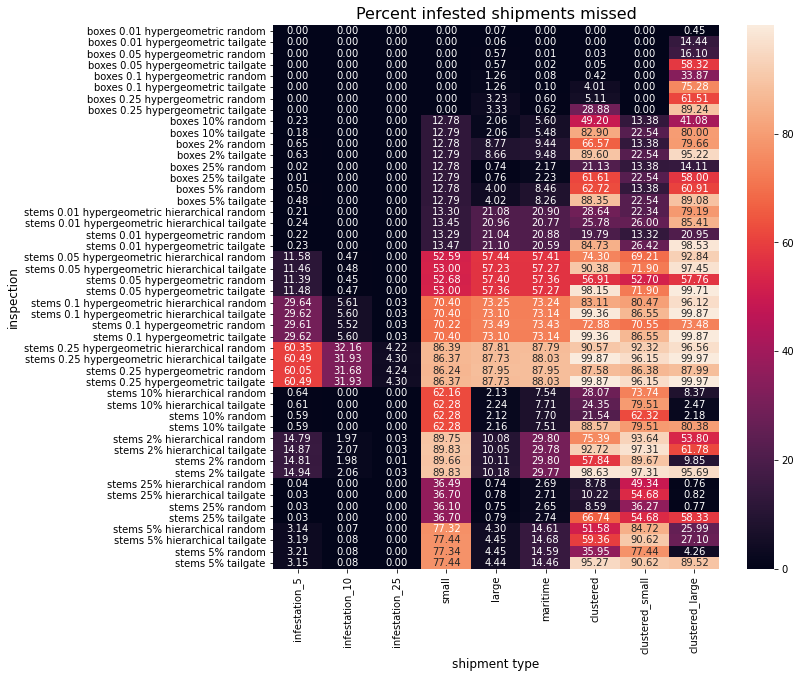

In [224]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Percent contaminated consignments missed", size=16)
plt.savefig("heatmap_missed.png", bbox_inches = "tight")

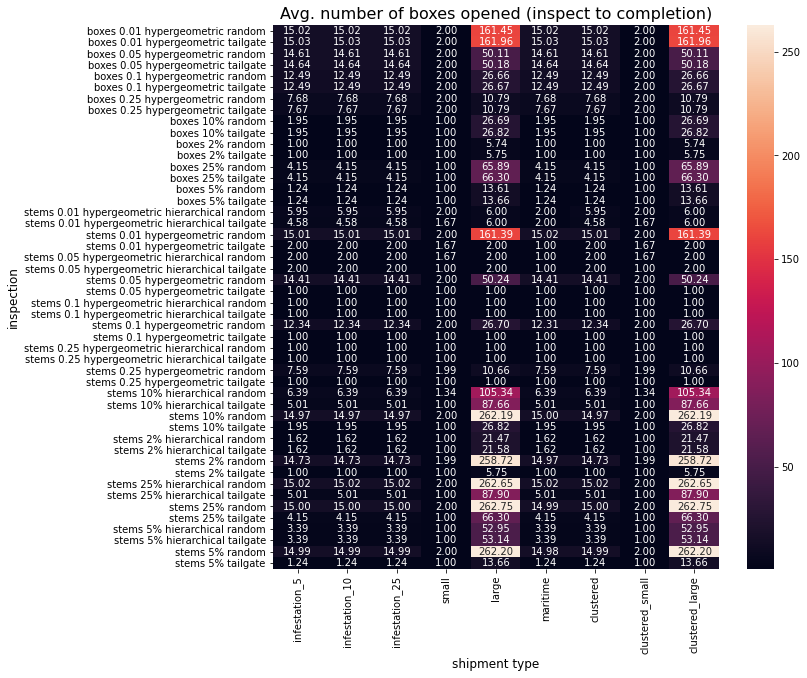

In [225]:
inspections_vs_consignments_boxes_opened = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_boxes_opened_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_boxes_opened, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of boxes opened (inspect to completion)", size=16)
plt.savefig("heatmap_boxes_completion.png", bbox_inches = "tight")

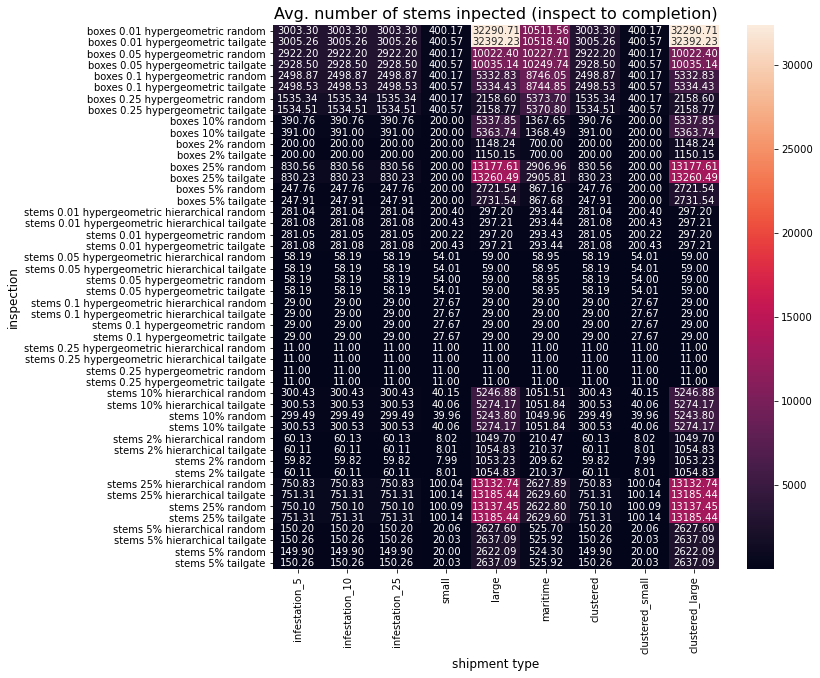

In [226]:
inspections_vs_consignments_items_inspected = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_items_inspected_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_items_inspected, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of items inpected (inspect to completion)", size=16)
plt.savefig("heatmap_items_completion.png", bbox_inches = "tight")

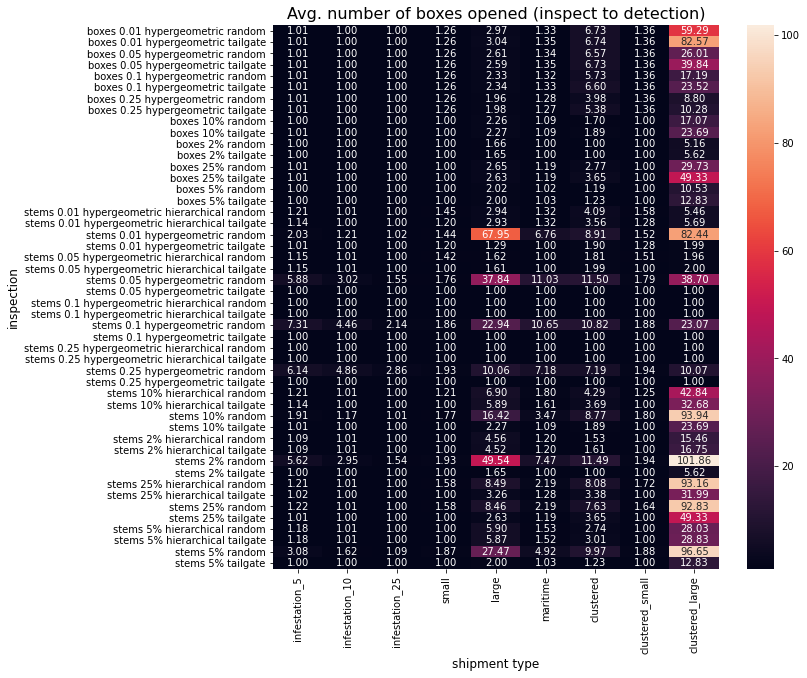

In [227]:
inspections_vs_consignments_boxes_opened_detection = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_boxes_opened_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_boxes_opened_detection, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of boxes opened (inspect to detection)", size=16)
plt.savefig("heatmap_boxes_detection.png", bbox_inches = "tight")

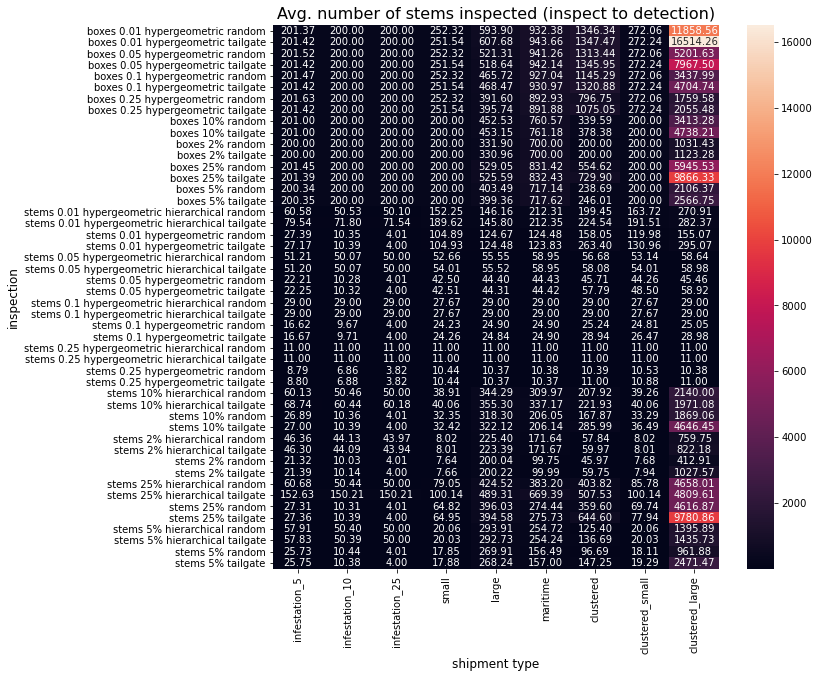

In [228]:
inspections_vs_consignments_stems_inspected_detection = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_stems_inspected_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_items_inspected_detection, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of items inspected (inspect to detection)", size=16)
plt.savefig("heatmap_items_detection.png", bbox_inches = "tight")

In [229]:
df_norm = df[["missing",
        "true_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_items_inspected_completion",
        "avg_items_inspected_detection",
        "pct_sample_if_to_detection",
        "pct_contaminants_unreported_if_detection"]]
df_norm

missing  true_infestation_rate  max_intercepted_infestation_rate  \
0     0.000000               0.047546                          0.194207   
1     0.000000               0.047342                          0.189794   
2     0.000000               0.047311                          0.185272   
3     0.000000               0.047361                          0.187627   
4     0.000000               0.047422                          0.189215   
..         ...                    ...                               ...   
427   0.768849               0.012217                          0.107368   
428  95.692811               0.012223                          0.092764   
429  89.518811               0.012223                          0.101271   
430  80.376185               0.012223                          0.102310   
431  58.325029               0.012223                          0.104587   

     avg_intercepted_infestation_rate  avg_boxes_opened_completion  \
0                            0.047546                     15.01651   
1                            0.047342                     14.61102   
2                            0.047311                     12.49435   
3                            0.047361                      7.67671   
4                            0.047422                     15.02628   
..                                ...                          ...   
427                          0.012340                    262.74902   
428                          0.020403                      5.75076   
429                          0.019639                     13.65769   
430                          0.018615                     26.81868   
431                          0.016632                     66.30247   

     avg_boxes_opened_detection  avg_stems_inspected_completion  \
0                       1.00683                      3003.30200   
1                       1.00758                      2922.20400   
2                       1.00735                      2498.87000   
3                       1.00817                      1535.34200   
4                       1.00708                      3005.25600   
..                          ...                             ...   
427                    92.83031                     13137.45100   
428                     5.61639                      1054.83484   
429                    12.83374                      2637.08710   
430                    23.69107                      5274.17420   
431                    49.33167                     13185.43550   

     avg_stems_inspected_detection  pct_sample_if_to_detection  \
0                        201.36600                    6.704894   
1                        201.51600                    6.896095   
2                        201.47000                    8.062483   
3                        201.63400                   13.132871   
4                        201.41600                    6.702328   
..                             ...                         ...   
427                     4616.87219                   35.143326   
428                     1027.57097                   97.415055   
429                     2471.47160                   93.719765   
430                     4646.45456                   88.098182   
431                     9780.86131                   74.179098   

     pct_pest_unreported_if_detection  
0                           93.336201  
1                           93.142578  
2                           91.977197  
3                           86.946634  
4                           93.335075  
..                                ...  
427                         99.382602  
428                         99.507143  
429                         99.629777  
430                         99.678498  
431                         99.737006  

[432 rows x 10 columns]

In [230]:
df_norm=(df_norm-df_norm.min())/(df_norm.max()-df_norm.min())
df_norm

missing  true_infestation_rate  max_intercepted_infestation_rate  \
0    0.000000               0.152650                          0.518631   
1    0.000000               0.151802                          0.504782   
2    0.000000               0.151673                          0.490587   
3    0.000000               0.151883                          0.497979   
4    0.000000               0.152135                          0.502965   
..        ...                    ...                               ...   
427  0.007691               0.005755                          0.246083   
428  0.957254               0.005780                          0.200247   
429  0.895493               0.005780                          0.226945   
430  0.804036               0.005780                          0.230207   
431  0.583449               0.005780                          0.237355   

     avg_intercepted_infestation_rate  avg_boxes_opened_completion  \
0                            0.147295                     0.053549   
1                            0.146443                     0.052000   
2                            0.146313                     0.043914   
3                            0.146524                     0.025508   
4                            0.146777                     0.053587   
..                                ...                          ...   
427                          0.000143                     1.000000   
428                          0.033845                     0.018150   
429                          0.030649                     0.048358   
430                          0.026370                     0.098639   
431                          0.018081                     0.249485   

     avg_boxes_opened_detection  avg_stems_inspected_completion  \
0                      0.000068                        0.092493   
1                      0.000075                        0.089989   
2                      0.000073                        0.076916   
3                      0.000081                        0.047163   
4                      0.000070                        0.092553   
..                          ...                             ...   
427                    0.910509                        0.405427   
428                    0.045772                        0.032326   
429                    0.117333                        0.081184   
430                    0.224985                        0.162616   
431                    0.479214                        0.406909   

     avg_stems_inspected_detection  pct_sample_if_to_detection  \
0                         0.011965                    0.062058   
1                         0.011974                    0.063981   
2                         0.011971                    0.075707   
3                         0.011981                    0.126682   
4                         0.011968                    0.062033   
..                             ...                         ...   
427                       0.279402                    0.347964   
428                       0.062006                    0.974012   
429                       0.149460                    0.936862   
430                       0.281194                    0.880345   
431                       0.592173                    0.740410   

     pct_pest_unreported_if_detection  
0                            0.935823  
1                            0.933882  
2                            0.922197  
3                            0.871759  
4                            0.935812  
..                                ...  
427                          0.996447  
428                          0.997695  
429                          0.998925  
430                          0.999413  
431                          1.000000  

[432 rows x 10 columns]

In [231]:
df_norm["name"], df_norm["inspection_num"], df_norm["inspection_name"], df_norm["consignment_name"] = df["name"], df["inspection_num"], df["inspection_name"], df["consignment_name"]
df_norm

missing  true_infestation_rate  max_intercepted_infestation_rate  \
0    0.000000               0.152650                          0.518631   
1    0.000000               0.151802                          0.504782   
2    0.000000               0.151673                          0.490587   
3    0.000000               0.151883                          0.497979   
4    0.000000               0.152135                          0.502965   
..        ...                    ...                               ...   
427  0.007691               0.005755                          0.246083   
428  0.957254               0.005780                          0.200247   
429  0.895493               0.005780                          0.226945   
430  0.804036               0.005780                          0.230207   
431  0.583449               0.005780                          0.237355   

     avg_intercepted_infestation_rate  avg_boxes_opened_completion  \
0                            0.147295                     0.053549   
1                            0.146443                     0.052000   
2                            0.146313                     0.043914   
3                            0.146524                     0.025508   
4                            0.146777                     0.053587   
..                                ...                          ...   
427                          0.000143                     1.000000   
428                          0.033845                     0.018150   
429                          0.030649                     0.048358   
430                          0.026370                     0.098639   
431                          0.018081                     0.249485   

     avg_boxes_opened_detection  avg_stems_inspected_completion  \
0                      0.000068                        0.092493   
1                      0.000075                        0.089989   
2                      0.000073                        0.076916   
3                      0.000081                        0.047163   
4                      0.000070                        0.092553   
..                          ...                             ...   
427                    0.910509                        0.405427   
428                    0.045772                        0.032326   
429                    0.117333                        0.081184   
430                    0.224985                        0.162616   
431                    0.479214                        0.406909   

     avg_stems_inspected_detection  pct_sample_if_to_detection  \
0                         0.011965                    0.062058   
1                         0.011974                    0.063981   
2                         0.011971                    0.075707   
3                         0.011981                    0.126682   
4                         0.011968                    0.062033   
..                             ...                         ...   
427                       0.279402                    0.347964   
428                       0.062006                    0.974012   
429                       0.149460                    0.936862   
430                       0.281194                    0.880345   
431                       0.592173                    0.740410   

     pct_pest_unreported_if_detection                name  inspection_num  \
0                            0.935823    infestation_5_10               1   
1                            0.933882    infestation_5_12               2   
2                            0.922197    infestation_5_14               3   
3                            0.871759    infestation_5_16               4   
4                            0.935812    infestation_5_09               5   
..                                ...                 ...             ...   
427                          0.996447  clustered_large_30              44   
428                          0.997695  clustered_large_17     

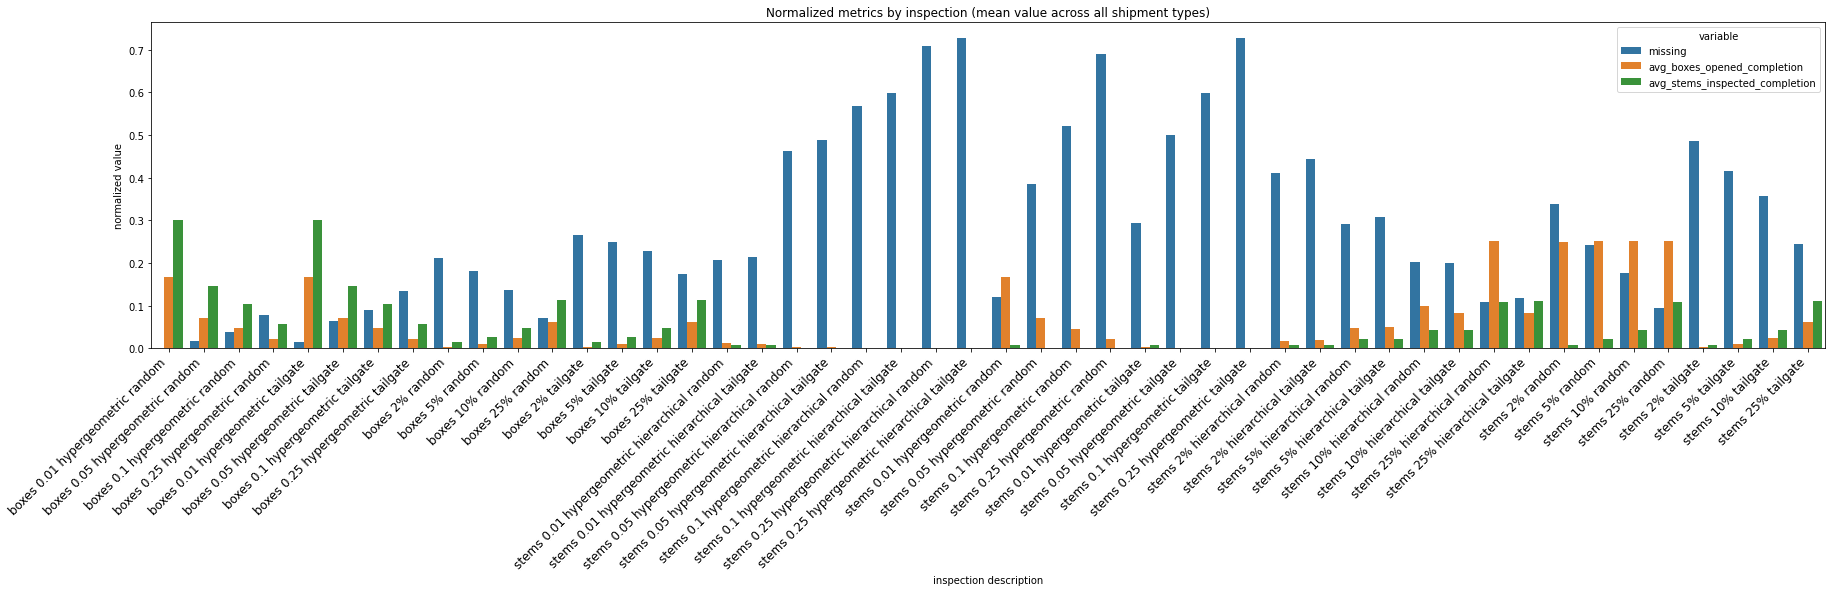

In [245]:
df_norm_melted = pd.melt(df_norm, id_vars=["inspection_num", "inspection_name", "consignment_name"], value_vars=["missing", "avg_boxes_opened_completion", "avg_items_inspected_completion"])
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted, ax=ax1, ci = None)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (mean value across all consignment types)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_all.png", bbox_inches = "tight")

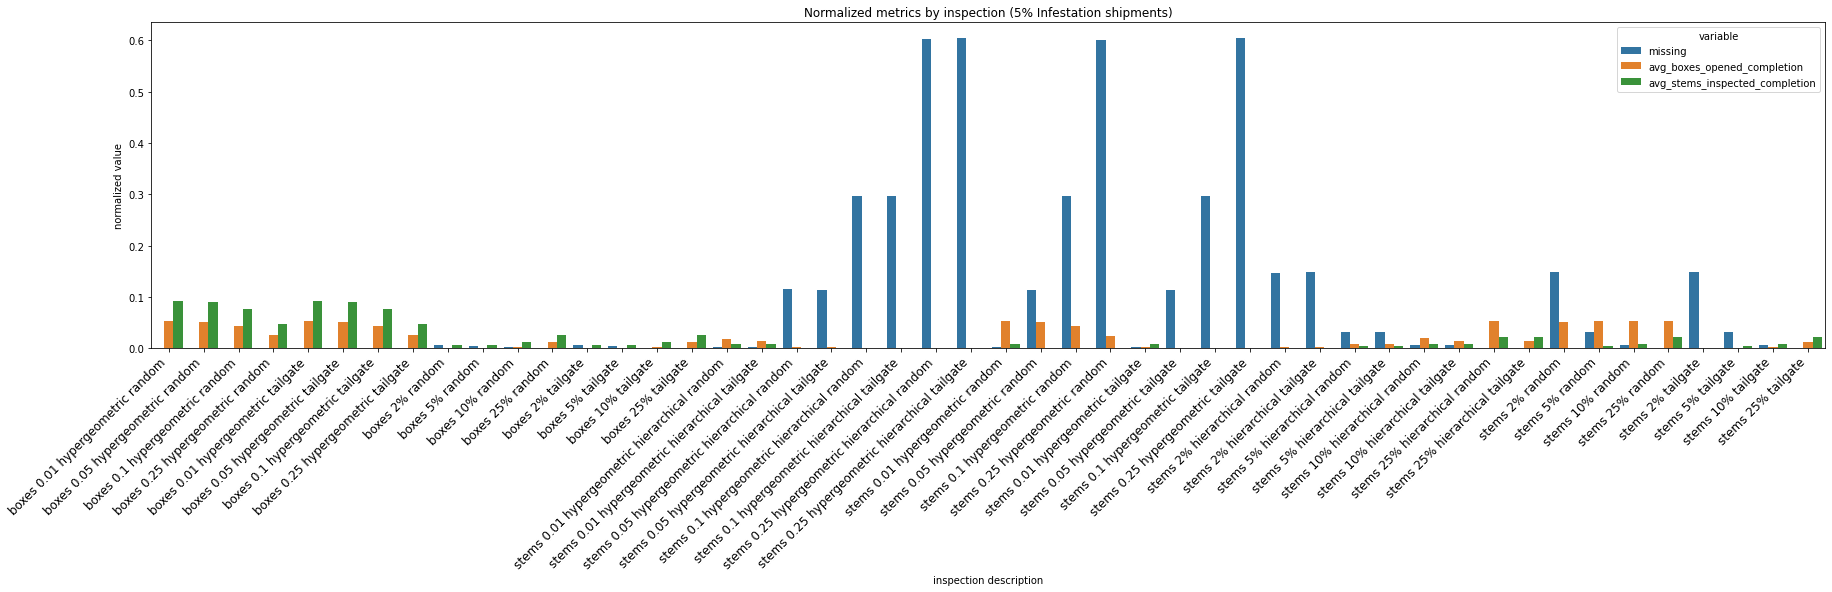

In [233]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("contamination_5")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (5% Contamination consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_contamination_5.png", bbox_inches = "tight")

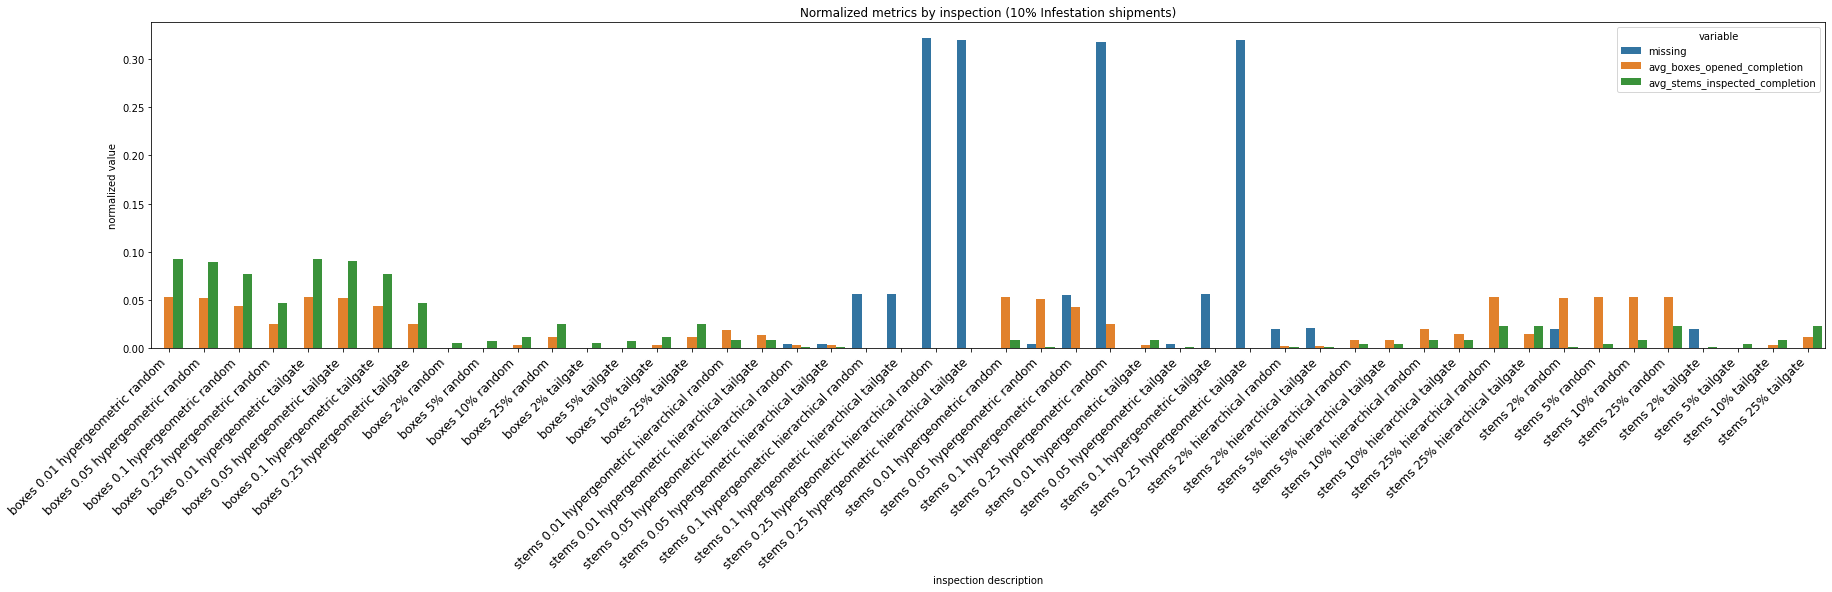

In [234]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("contamination_10")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (10% Contamination consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_contamination_10.png", bbox_inches = "tight")

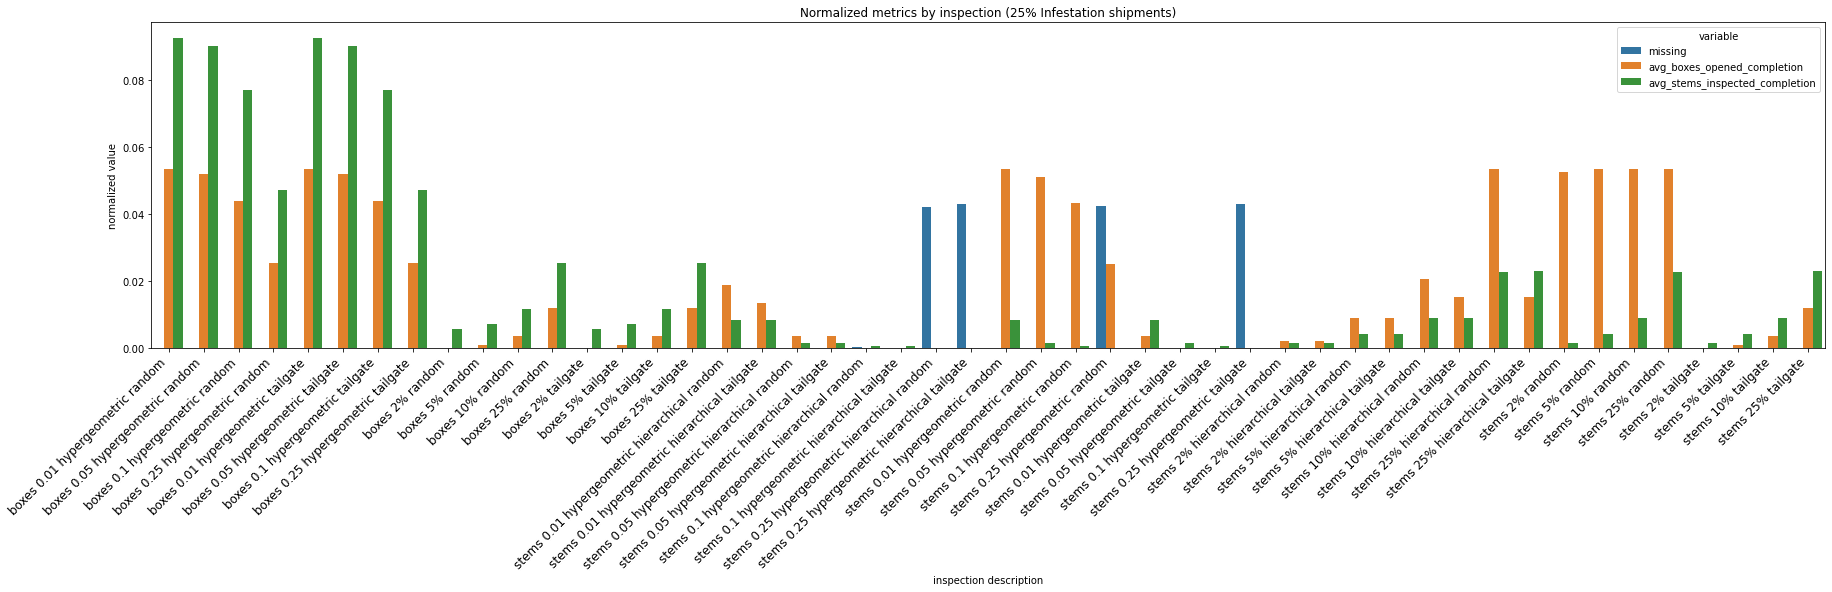

In [235]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("contamination_25")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (25% Contamination consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_contamination_25.png", bbox_inches = "tight")

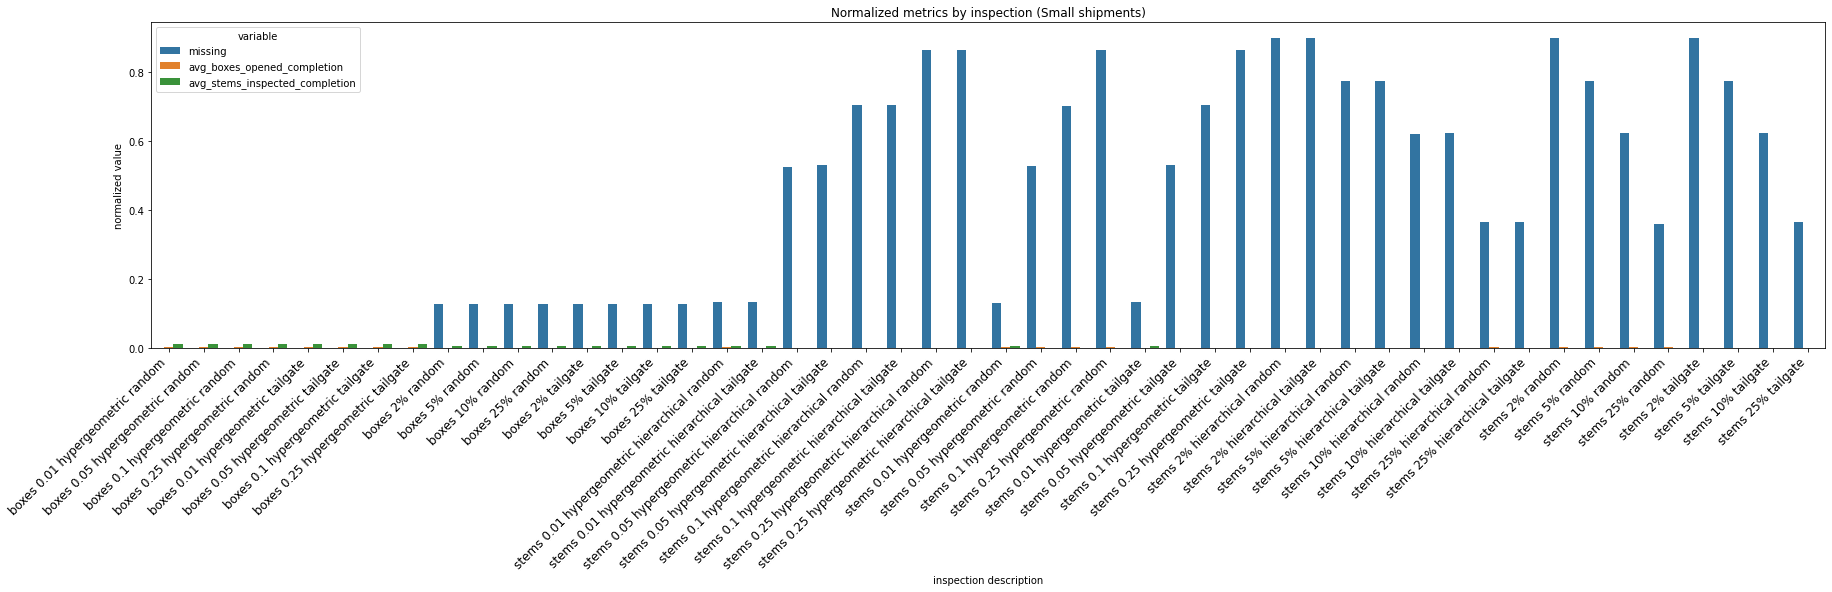

In [236]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("small")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Small consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_small.png", bbox_inches = "tight")

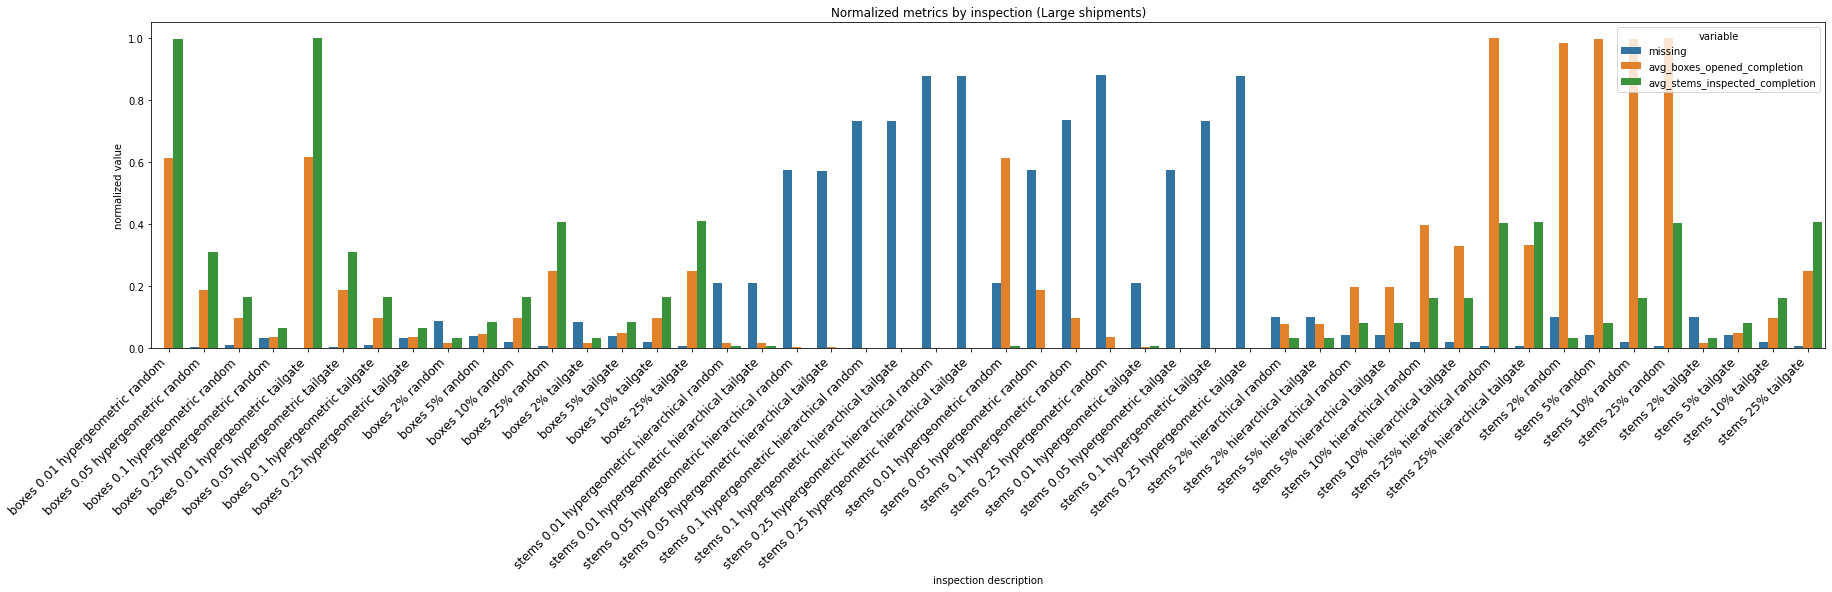

In [237]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("large")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Large consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_large.png", bbox_inches = "tight")

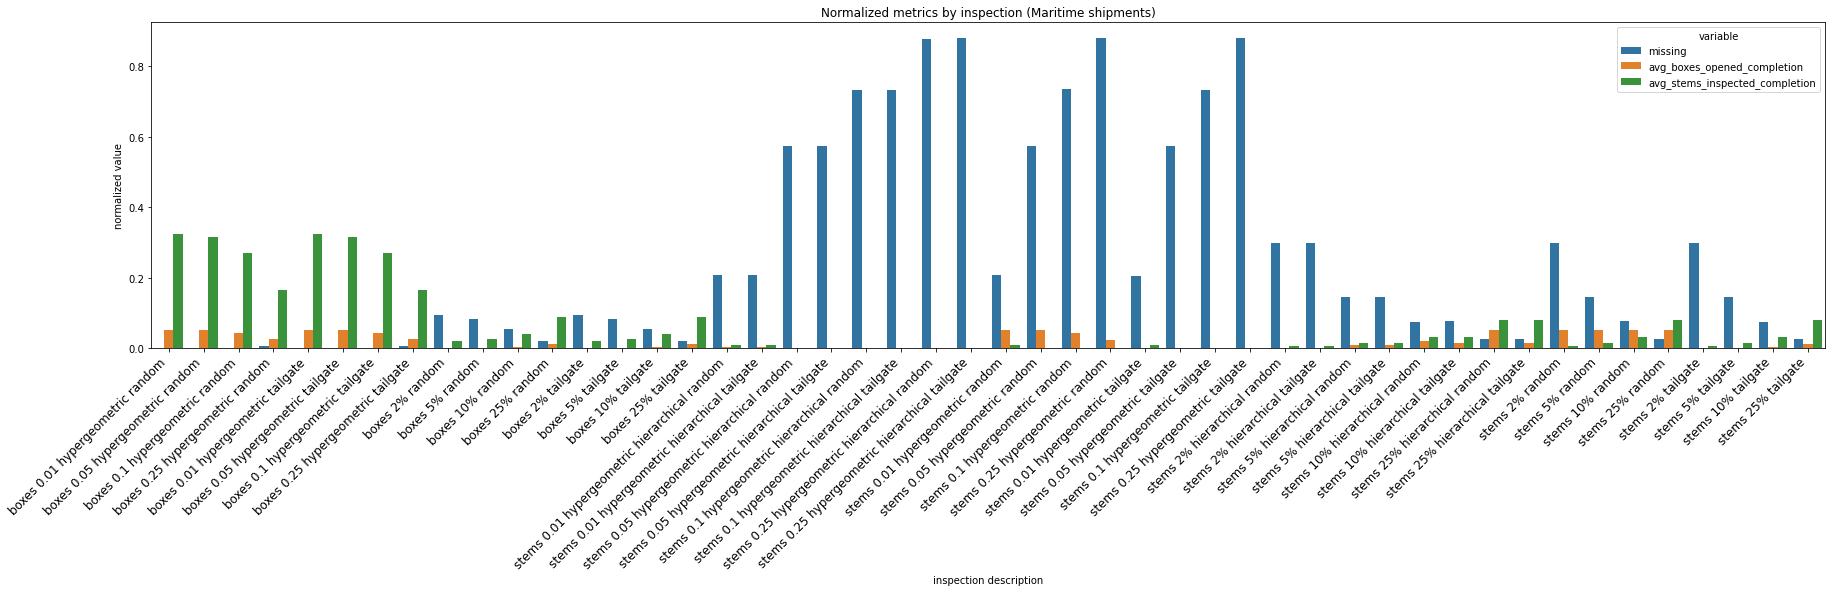

In [238]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("maritime")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Maritime consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_maritime.png", bbox_inches = "tight")

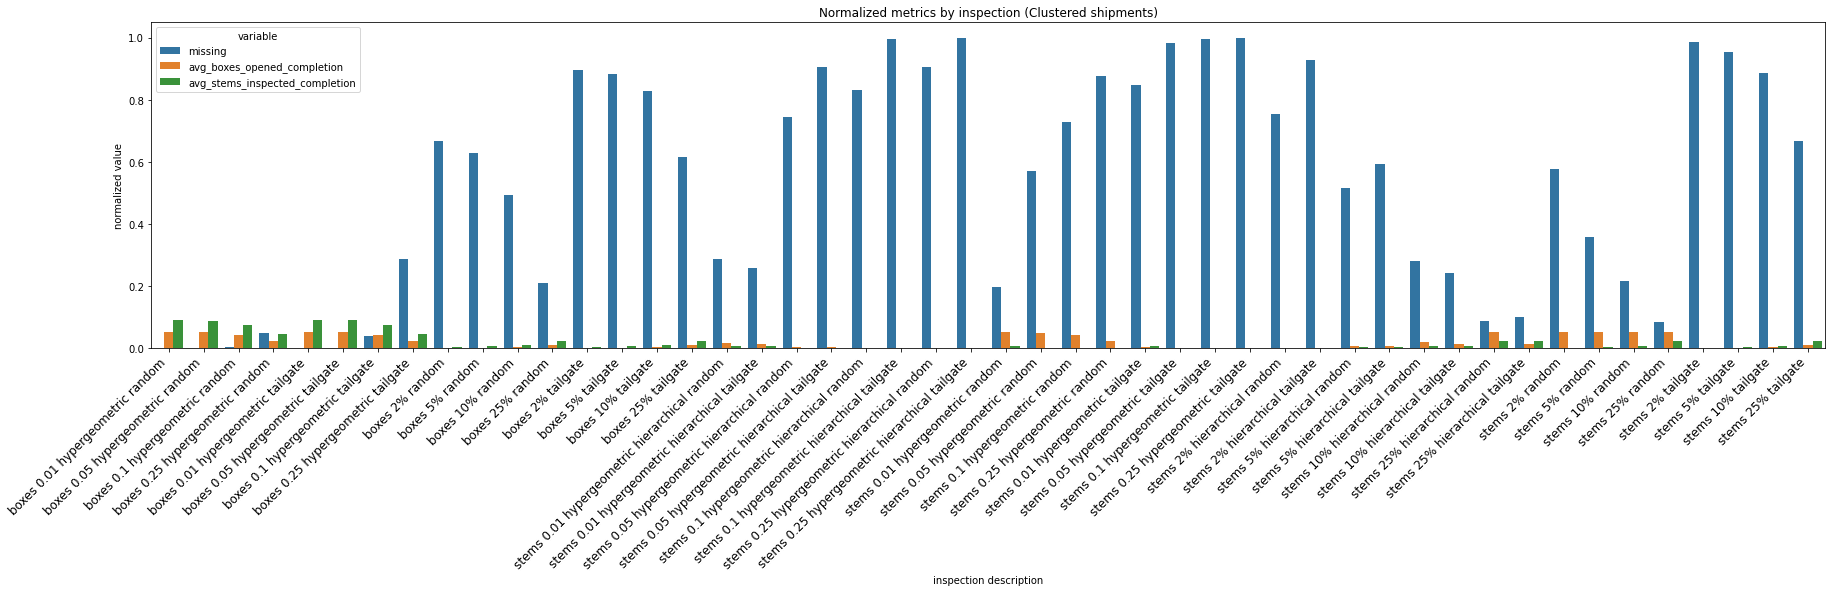

In [239]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("clustered")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered.png", bbox_inches = "tight")

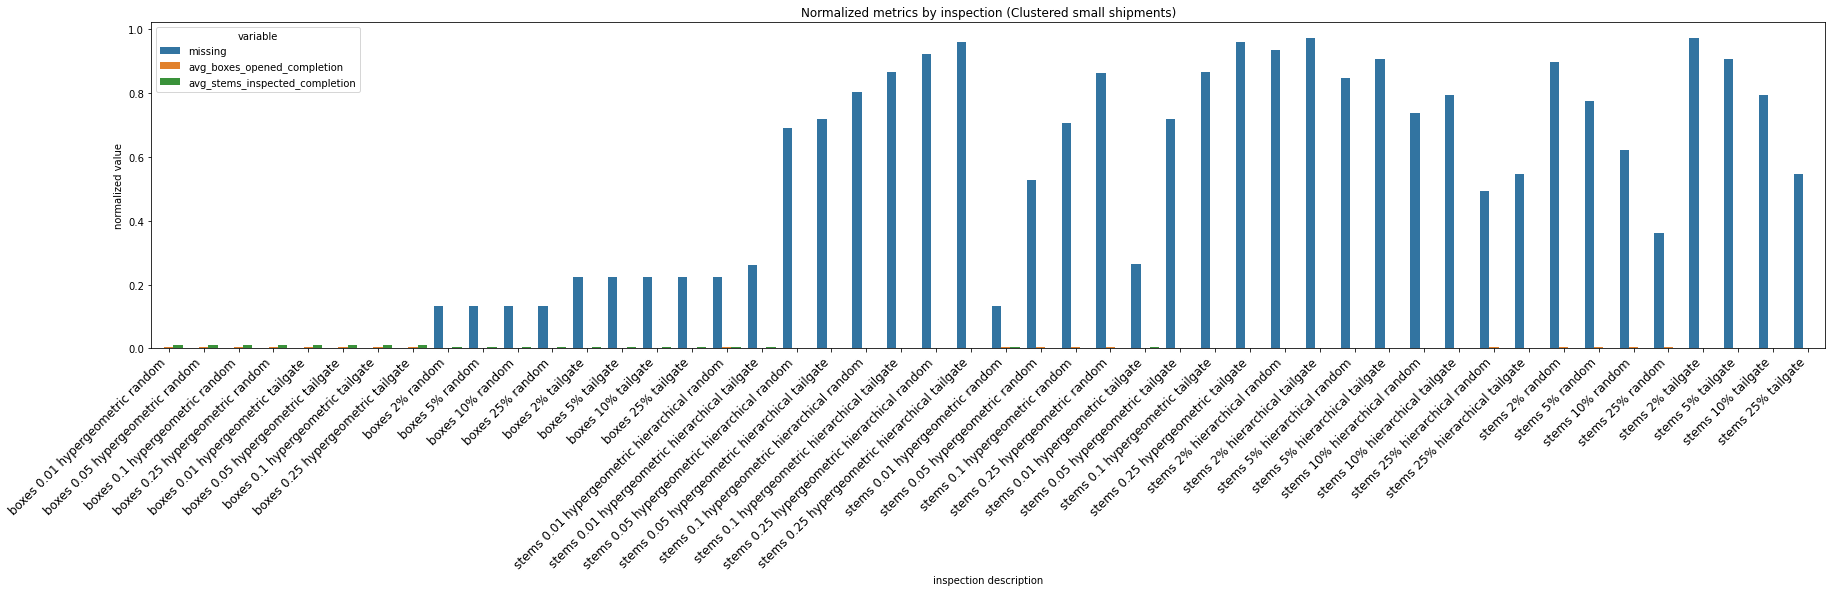

In [240]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("clustered_small")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered small consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered_small.png", bbox_inches = "tight")

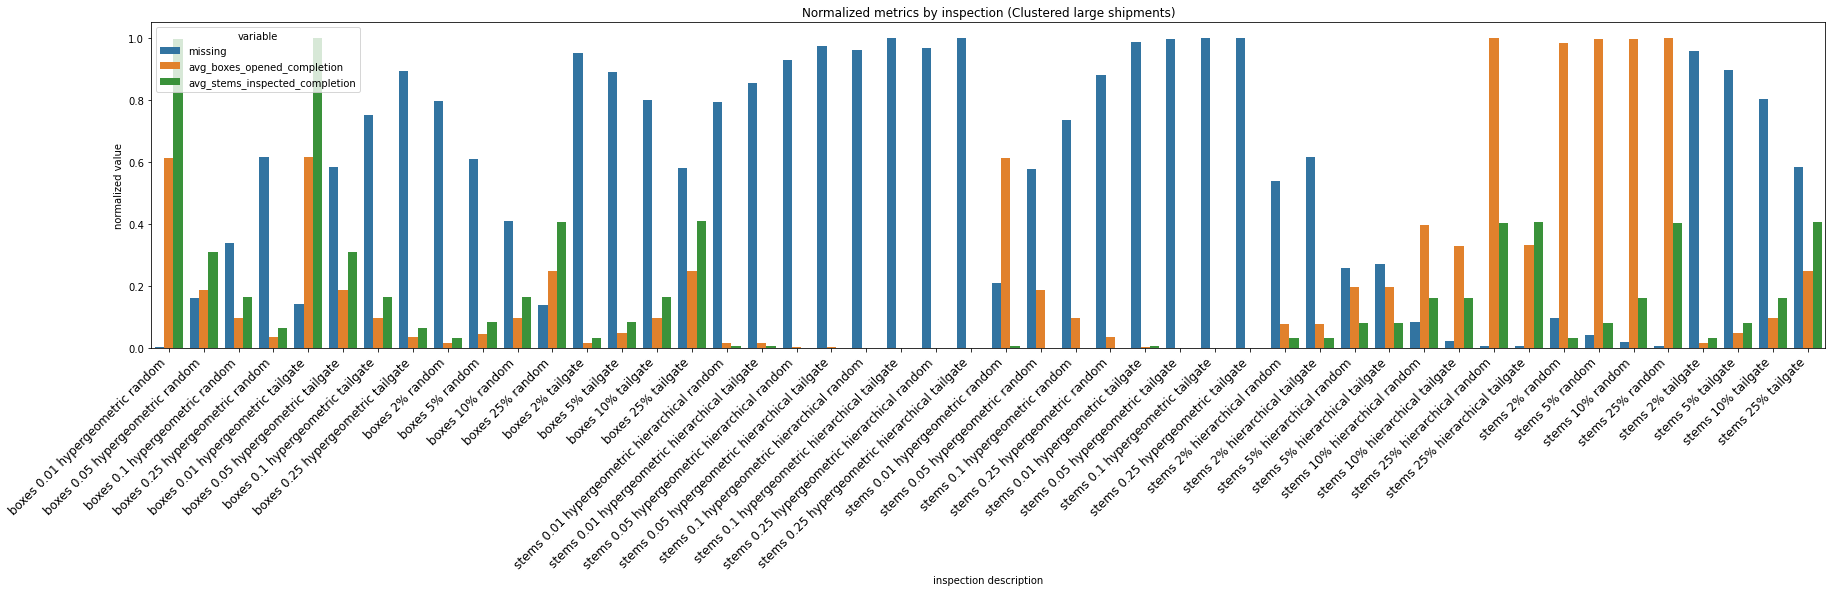

In [241]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("clustered_large")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered large consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered_large.png", bbox_inches = "tight")